In [1]:
import numpy as np
import gzip
from keras.datasets import mnist
import matplotlib.pyplot as plt 
import time
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


## **1. Applying Normalization to training and test dataset**

In [0]:
X_train=X_train.reshape(-1, 784).astype('float32')
X_train=X_train[:50000]
X_test=X_test.reshape(-1, 784).astype('float32')
Y_train=Y_train[:50000]
Y_train=Y_train.reshape(50000,1)
Y_test=Y_test.reshape(10000,1)
Y_test= np.where(Y_test<5, 0, Y_test)
Y_test= np.where(Y_test>4, 1, Y_test)
Y_train= np.where(Y_train<5, 0, Y_train)
Y_train= np.where(Y_train>4, 1, Y_train)
X_train= (X_train- np.mean(X_train, axis=1).reshape(50000,1))/np.std(X_train,axis=1).reshape(50000,1)
X_test= (X_test- np.mean(X_test, axis=1).reshape(10000,1))/np.std(X_test,axis=1).reshape(10000,1)
X_train=np.append(X_train,np.ones([50000,1]),1)
X_test=np.append(X_test,np.ones([10000,1]),1)




## **2. Baseline, LInear Classifier with quadratic loss**

In [0]:
def baseline_gradient(X_train,y_train,learning_rate,iterations,X_test,T_test):
    weight = np.zeros((1,785))
    for itr in range(iterations):
        random_index=np.random.choice(X_train.shape[0],replace=False)
        X=X_train[random_index].reshape(785,1)
        y=y_train[random_index]
        predict=np.dot(weight,X)
        gradW= -np.dot(X, (y-predict))
        weight = weight - (learning_rate *(gradW.transpose())) 
    predict=np.dot(X_train,weight.transpose())
    predict[predict<0.5]=0
    predict[predict>=0.5]=1
    accuracy=sum(predict==y_train)/float(len(y_train))
    print("Linear classifier accuracy:",accuracy*100)

In [4]:
baseline_gradient(X_train,Y_train,0.0001,50000,X_test,Y_test)
  


Linear classifier accuracy: [84.822]


## **3. Neural Network with quadratic loss for different k**

In [0]:
def relu(x):
    return np.maximum(x,0)

def sigmoid(weights):
    return 1.0 / (1.0 + np.exp(-weights))

In [0]:
def predict(x,w,v):
    return np.dot(relu(x.dot(w.transpose())),v)

def feed_forward(x,y,w,v):
    x=x.reshape(1,785)
    h=relu(x.dot(w.transpose()))
    sigmap=x.dot(w.transpose())>0+0.
    sigmap=sigmap.transpose()
    yh=predict(x,w,v)
    r=yh-y
    grad_w=r*((sigmap*v).dot(x))
    grad_v=r*h
    return grad_w,grad_v


def cost(X,Y,w,v):
    return npl.norm(Y-predict(X,w,v))**2

In [0]:
K=[5,40,100]

In [0]:
def quadratic_lossNN(X_train, y_train,learning_rate,iter, X_test, Y_test,k):
    accu_train=[]
    accu_test=[]
    epochs=5
    count=0
    w =np.random.normal(0,1/np.sqrt(k),k*785).reshape(k,785)
    v =np.random.normal(0,1/10,k).reshape(k,1)
    grad_w=0
    grad_v=0
    for i in range(epochs):
        for itr in range(iter): 
            random_index=np.random.choice(X_train.shape[0],replace=False)
            X=X_train[random_index]
            y=y_train[random_index]
            gw,gv=feed_forward(X,y,w,v)        
            w-=learning_rate*gw
            v-=learning_rate*(gv.transpose())
            count+=1
            if((count%500)==0):
                pred=predict(X_train,w,v)
                pred[pred<0.5]=0
                pred[pred>=0.5]=1
                accuracy_train=sum(pred==y_train)/float(len(y_train))
                accu_train.append(accuracy_train)
                pred=predict(X_test,w,v)
                pred[pred<0.5]=0
                pred[pred>=0.5]=1
                accuracy_test=sum(pred==Y_test)/float(len(Y_test))
                accu_test.append(accuracy_test)
    plt.plot(accu_train,'b') 
    plt.plot(accu_test,'r') 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Accuracy ") 
    plt.show()
    print("accuracy of the train function for",k,"hidden layer is :", accu_train[-1]*100)

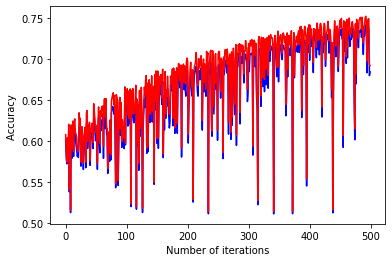

accuracy of the train function for 5 hidden layer is : [68.39]


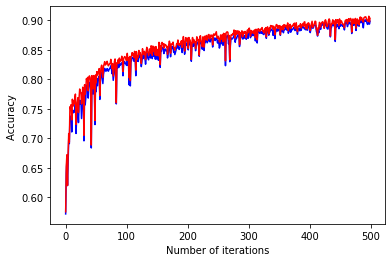

accuracy of the train function for 40 hidden layer is : [89.842]


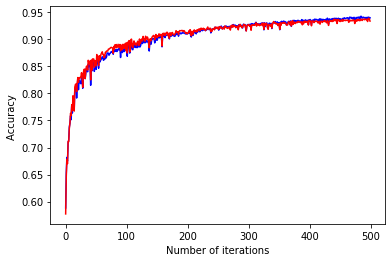

accuracy of the train function for 100 hidden layer is : [93.982]


In [9]:
for k in range(len(K)):
    quadratic_lossNN(X_train, Y_train,0.0004,50000,X_test,Y_test,K[k]) 



## **4. Neural network with logistic loss and sigmoid activation**

In [0]:
def feed_forward_sigmoid(x,y,w,v):
    x=x.reshape(1,785)
    h=relu(x.dot(w.transpose()))
    sigmap=x.dot(w.transpose())>0+0.
    sigmap=sigmap.transpose()
    yh=sigmoid(predict(x,w,v))
    r=yh-y
    grad_w=r*((sigmap*v).dot(x))
    grad_v=r*h
    return grad_w,grad_v

def logistic_lossNN(X_train, y_train,learning_rate,iter, X_test, Y_test,k): 
    accu_train=[]
    accu_test=[]
    epochs=5
    count=0
    w =np.random.normal(0,1/np.sqrt(k),k*785).reshape(k,785)
    v =np.random.normal(0,1/10,k).reshape(k,1)
    grad_w=0
    grad_v=0
    for i in range(epochs):
        for itr in range(iter): 
            random_index=np.random.choice(X_train.shape[0],replace=False)
            X=X_train[random_index]
            y=y_train[random_index]
            gw,gv=feed_forward_sigmoid(X,y,w,v)        
            w-=learning_rate*gw
            v-=learning_rate*(gv.transpose())
            count+=1
            if((count%500)==0):
                pred=sigmoid(predict(X_train,w,v))
                pred[pred<0.5]=0
                pred[pred>=0.5]=1
                accuracy_train=sum(pred==y_train)/float(len(y_train))
                accu_train.append(accuracy_train)
                pred=sigmoid(predict(X_test,w,v))
                pred[pred<0.5]=0
                pred[pred>=0.5]=1
                accuracy_test=sum(pred==Y_test)/float(len(Y_test))
                accu_test.append(accuracy_test)
    plt.plot(accu_train,'b') 
    plt.plot(accu_test,'r') 
    plt.xlabel("Number of iterations") 
    plt.ylabel("Accuracy ") 
    plt.show()
    print("accuracy of the train function for",k,"hidden layer is :", accu_train[-1]*100)

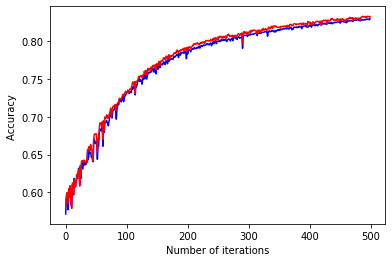

accuracy of the train function for 5 hidden layer is : [83.038]


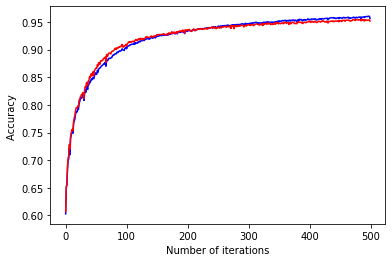

accuracy of the train function for 40 hidden layer is : [95.636]


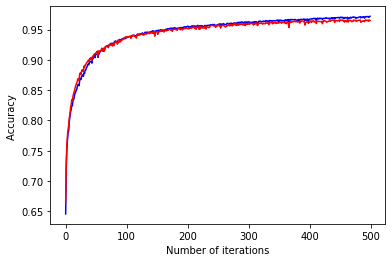

accuracy of the train function for 100 hidden layer is : [97.196]


In [11]:
for k in range(len(K)):
    logistic_lossNN(X_train, Y_train,0.0004,50000,X_test,Y_test,K[k]) 

**5. On comparing linear model and neural network we can say that neural network is showing greater accuracy because it is able to get the non linear features from the data where as linear classifier only works on the linear features.** 

**On comparing quadratic loss and logistic loss , the latter is showing more accuracy because the logistic loss tends to penalize the weights more which makes it more effective.**